In [88]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.widgets as wid
import scipy.signal as sig
import scipy.signal.windows as win
import scipy 
import scipy.io
from scipy.signal import lfilter

import numpy.random as rand

import util

## 1. Étude Théorique : Analyse du mélange de deux processus

### Montrer que

$$
S_Z(\nu) = S_Y(\nu) + S_T(\nu)
$$

On a $Z = h \star X + Y$

$h$ est stable, $X$ est SSL donc $T$ est SSL par le théorème de filtrage des processus SSL. Par le résultat admis, on a $T$ et $Y$ indépendants.

On montre d'abord que $Z$ est SSL.

1. On a, pour tout $n$,
$$
E(|T_n + Y_n|^2) = E(|T_n|^2 + 2 |T_nY_n| + |Y_n|^2)
$$
$$
= E(|T_n|^2) + 2E(|T_nY_n|) + E(|Y_n|^2)
$$
Avec $T_n$ et $Y_n$ indépendants et SSL:
$$
= E(|T_n|^2) + E(|T_n|)E(|Y_n|) + E(|Y_n|^2) < +\infty
$$

2. On a bien :
$$
E(Z_n) = E(T_n) + E(Y_n) = m_T + m_Y = m_Z, \forall n
$$

3. On a :
$$
R_Z(k) = R_T(k) + R_Y(k) + E(T_{n+k}^{c}\bar{Y_{n}^c}) + E(\bar{T_{n}^c}Y_{n+k}^{c})
$$
Avec les termes de covariance nuls car $T$ et $Y$ sont indépendants :
$$
R_Z(k) = R_T(k) + R_Y(k)
$$
Ne dépend que de $k$, a fortiori :
$$
S_Z(\nu) = S_T(\nu) + S_Y(\nu)
$$

### Montrer que

Quelque soit la suite sommable $h^1$ et on notant $Z^1$ le processus $Z^1 = Z − h^1 ∗ X$ on a : 

$$
R_{Z^1}(0) \geq R_Y(0)
$$
Et si $R_{Z^1}(0) \geq R_Y(0)$ alors $h^1 = h$.


Par le calcul on a :
$$
R_{Z^1}(0) = R_Y(0) + R_{(h - h^1) ∗ X_n}(0) \geq 0
$$
Soit :
$$
R_{Z^1}(0) \geq R_Y(0)
$$
Et si $h^1 = h$ on obtient :
$$
R_{Z^1}(0) = R_Y(0) + R_{\tilde{0} ∗ X_n}(0) = R_Y(0)
$$

### 1.1 Première application : Identifier un canal

In [89]:
def part_1_1(x, h, n, sigma):
    h = np.array(h)
    y = sigma * rand.randn(n)
    z = lfilter(h, [1], x) + y
    # ici on connaît p, on peut l'écrire
    p = len(h) - 1
    h_estimated = util.moindres_carres(p, x, z)
    h_err = util.norm(h_estimated - h) / util.norm(h)
    return h_estimated, h_err

def print_part_1_1(x, h, n, sigma):
    h_estimated, h_err = part_1_1(x, h, n, sigma)
    print(f"h = {h}")
    print(f"h estimé = {h_estimated}")
    print(f"Erreur = {h_err}")
    return x, h_estimated


In [90]:
# Donnés
h = [1, 0.5]
#
n = 1000
x = rand.randn(n)
sigmas = [0.1, 1, 10]
for sigma in sigmas:
    print(f"sigma = {sigma}")
    print_part_1_1(x, h, n, sigma)

sigma = 0.1
h = [1, 0.5]
h estimé = [1.00127024 0.50444978]
Erreur = 0.004138991260306937
sigma = 1
h = [1, 0.5]
h estimé = [0.98064827 0.48403364]
Erreur = 0.02243949907022006
sigma = 10
h = [1, 0.5]
h estimé = [1.13775729 0.34096677]
Erreur = 0.18818850175787755


L'erreur semble augmenter linéairement avec $\sigma$.

In [91]:
h = [1, 0.5]
#
ns = np.power(2, np.arange(10, 15))  
sigma = 10
for n in ns:
    x = rand.randn(n)
    print(f"n = {n}")
    print_part_1_1(x, h, n, sigma)

n = 1024
h = [1, 0.5]
h estimé = [1.46364247 1.03051267]
Erreur = 0.6301796801673246
n = 2048
h = [1, 0.5]
h estimé = [0.92874463 0.52007897]
Erreur = 0.06621475706042874
n = 4096
h = [1, 0.5]
h estimé = [1.08188273 0.48080027]
Erreur = 0.07522452015189257
n = 8192
h = [1, 0.5]
h estimé = [0.86536871 0.34455981]
Erreur = 0.18392876688676305
n = 16384
h = [1, 0.5]
h estimé = [0.94384329 0.59571836]
Erreur = 0.09925958406381377


On note qu'en moyenne pour $\sigma = 10$, il faut $N = 2^{14}$ pour obtenir une erreur relative $e \leq 0.1$.

On déterminera la longueur de $h$ empiriquement.

Si $h$ trop court, ça ne va pas fonctionner, si
$h$ trop long les derniers coefficients seront nuls et on pourra réduire. On choisira $p$ tel que $h_n = 0, \forall n \geq p$.

In [92]:
h = [1, 0.5]
#
ns = np.power(2, np.arange(10, 15))  
sigma = 1
for n in ns:
    x = np.zeros(n)
    x[n//2] = 1
    print(f"n = {n}")
    print_part_1_1(x, h, n, sigma)

n = 1024
h = [1, 0.5]
h estimé = [1.65682936 1.48612663]
Erreur = 1.0597624383895763
n = 2048
h = [1, 0.5]
h estimé = [0.91176296 1.48356347]
Erreur = 0.883258904400406
n = 4096
h = [1, 0.5]
h estimé = [1.22093037 1.41084906]
Erreur = 0.8383107953886136
n = 8192
h = [1, 0.5]
h estimé = [-0.19970002 -2.73844652]
Erreur = 3.088924215522525
n = 16384
h = [1, 0.5]
h estimé = [1.98489729 0.48476023]
Erreur = 0.8810243660420204


Prendre $X = \delta[0]$ ne peut pas fonctionner pas car l'impulsion est absorbée dans le régime transitoire de $h$, et ne permet pas de le déterminer.
Dans le cas plus général de $X = \delta[a]$, la réponse impulsionnelle est absorbée par $X$, et on a le même problème.

### 1.2 Seconde application : Suppression d'un son qui en parasite un autre

In [93]:
def last_pred(pred, arr, axis, invalid_val=-1):
    # trouver les indices des dernières valeurs vérifiant pred
    # source : https://stackoverflow.com/a/47269413
    mask = pred(arr)
    val = arr.shape[axis] - np.flip(mask, axis=axis).argmax(axis=axis)
    return np.where(mask.any(axis=axis), val, invalid_val)

In [94]:
f_e = 44100
mat = scipy.io.loadmat('parasite.mat')
x_par = mat['Xparasite'].reshape(-1)
z_par = mat['Zparasite'].reshape(-1)

p_prior = 20
h_estimated_prior = util.moindres_carres(p_prior, x_par, z_par)

precision = 0.01
p = len(h_estimated_prior) - 1 - last_pred(lambda arr: arr < precision, np.flipud(h_estimated_prior), 0)  
h_estimated = util.moindres_carres(p, x_par, z_par)
y = z_par - lfilter(h_estimated, [1], x_par)

print(f"p = {p}")
h_estimated_pad = np.pad(h_estimated, (0, len(h_estimated_prior) - len(h_estimated)))
p_err = util.norm(h_estimated_pad - h_estimated_prior) / util.norm(h_estimated_prior)
print(f"Erreur relative induite par la réduction de p = {p_err}")

# util.play(z_par, f_e)
util.play(y, f_e)

p = 3
Erreur relative induite par la réduction de p = 0.001483346302971116


## 2 Le modèle auto-régressif pour la synthèse de parole

$\epsilon_n$ est tel que :
$$
X_n + h_1X_{n-1} + ... + h_p X_{n-p} = \epsilon_n
$$

### 2.1 Test du modèle et du programme fourni

In [95]:
def part_2_1(x, h, n, sigma):
    h = np.array(h)
    p = len(h) - 1
    h_estimated = util.lpc_morceau(p, x)
    h_err = util.norm(h_estimated - h) / util.norm(h)
    return h_estimated, h_err

def print_part_2_1(epsilon, h, n, sigma):
    x = lfilter([1], h, epsilon)
    h_estimated, h_err = part_2_1(x, h, n, sigma)
    print(f"h = {h}")
    print(f"h estimé = {h_estimated}")
    print(f"Erreur = {h_err}")



/tmp/tmphb8i7vuzSON_TP.wav:

 File Size: 198k      Bit Rate: 706k
  Encoding: Signed PCM    
  Channels: 1 @ 16-bit   
Samplerate: 44100Hz      
Replaygain: off         
  Duration: 00:00:02.25  

In:100%  00:00:02.25 [00:00:00.00] Out:99.2k [ -====|====- ] Hd:0.0 Clip:0    
Done.


In [96]:
n = 1000
sigma = 1
epsilon = rand.randn(n)

h = np.array([1, 0.5])
print_part_2_1(epsilon, h, n, sigma)


h = np.array([1, 2])
print_part_2_1(epsilon, h, n, sigma)

h = [1.  0.5]
h estimé = [1.         0.48571219]
Erreur = 0.012779408774662706
h = [1 2]
h estimé = [ 1. nan]
Erreur = nan


On trouve bien $h = [1; 0,5]$ mais pas $h = [1; 2]$.

En effet, $h = [1; 0,5]$ donne $H(z) = \frac{1}{1 + \frac{z^{-1}}{2}}$, et $h$ est une implémentation stable et causale (racine $0,5 \leq 0$). On peut la calculer sans problème.

En revanche, $h = [1; 2]$ donne $H(z) = \frac{1}{1 + 2z^{-1}}$ a une racine en $2$ donc notre implémentation causale n'est pas stable, et la sortie diverge.

In [102]:
h = np.array([1, 0.5])

x = lfilter([1], h, epsilon)
h_estimated, h_err = part_2_1(x, h, n, sigma)
x_p = lfilter(h_estimated, [1], x)

val = np.sum(x_p ** 2) / (n * sigma ** 2)

print(f"Rapport de variance sortie / entrée = {val}")

Rapport de variance entrée / sortie = 1.0271523468047672


La valeur nous donne le rapport (approximé) des variances :
$$
r = \frac{V(x')}{V(x)}
$$
Avec :
$$
x' = h_{approx}^{-1} * h_{approx} * x
$$
D'où $r \rightarrow 0$ quand $h_{approx} \rightarrow h$.

### 2.2 Application du modèle à un signal de parole

In [112]:
f_e = 44100
mat = scipy.io.loadmat('modelear.mat')
aeiou = mat['aeiou']

p = 15
nb = 2000

lpcs, res = util.lpc(aeiou, p, nb)  # tester d'autres valeurs de 15
out = util.joue_lpc(lpcs, res, nb)

# util.play(aeiou, f_e)
util.play(out, f_e)


/tmp/tmp9x158xjfSON_TP.wav:

 File Size: 200k      Bit Rate: 706k
  Encoding: Signed PCM    
  Channels: 1 @ 16-bit   
Samplerate: 44100Hz      
Replaygain: off         
  Duration: 00:00:02.27  

In:100%  00:00:02.27 [00:00:00.00] Out:100k  [      |      ] Hd:0.0 Clip:0    
Done.


Sans le filtrage passe-haut au début de `joue_lpc`, on entend moins bien le son de la voix situé dans les hautes fréquences.

Pour $p \leq 5$ on a un son de très mauvaise qualité qui s'améliore quand p croît, juqu'à $p \geq 20$ où l'on n'entend plus de différence. 

In [117]:
def joue_lpc_2(lpcs, res, nb, nu_s, f_e):
    """joue le resultat de lpcs: cree des trames de bruit, les filtre par les coefficients de la LPC et renvoie un signal concaténé."""
    taille = lpcs.shape[0]
    out = np.zeros(taille*nb)
    # cordesvocales = randn(len(out))
    # Alternative les cordes vocales envoient des impulsions régulières
    cordesvocales=np.zeros(len(out))
    cordesvocales[::int(nu_s * f_e)]=1
    for k in range(taille):
        epsilon = res[k]*cordesvocales[k*nb:(k+1)*nb]

        tmp = lfilter([1], lpcs[k, :], epsilon)
        out[k*nb:(k+1)*nb] = tmp

    return out

In [123]:

f_e = 44100
mat = scipy.io.loadmat('modelear.mat')
aeiou = mat['aeiou']

p = 15
nb = 2000

nu_s = 0.01

lpcs, res = util.lpc(aeiou, p, nb)
out = joue_lpc_2(lpcs, res, nb, nu_s, f_e)

# util.play(aeiou, f_e)
util.play(out, f_e)


/tmp/tmphgwhv3xdSON_TP.wav:

 File Size: 200k      Bit Rate: 706k
  Encoding: Signed PCM    
  Channels: 1 @ 16-bit   
Samplerate: 44100Hz      
Replaygain: off         
  Duration: 00:00:02.27  

In:100%  00:00:02.27 [00:00:00.00] Out:100k  [      |      ] Hd:0.0 Clip:0    
Done.


<Figure size 576x576 with 0 Axes>

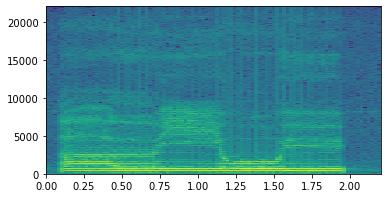

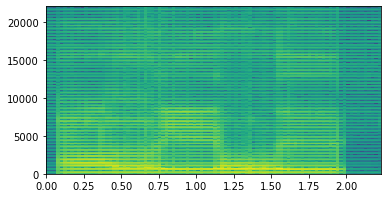

In [127]:
n = 2048
plt.figure(figsize=(8, 8))
spectro_1 = util.affiche_spectrogramme(aeiou, n, Fe=f_e)
"""
     Si M n'est pas fourni il est pris égal à N
     nb est le pas entre deux fenêtres dont on calcule la TFD 
     si nb n'est pas fourni, nb est pris égal a N/2"""
spectro_2 = util.affiche_spectrogramme(out, n, Fe=f_e)

On voit que l'on devrait idéalmenet envoyer les impulsions aux fréquences dont la contribution à la puissance est grande sur l'échantillon traité. 

## 3 Estimation de la densité spectrale de puissance : périodogramme

1. On a selon le cours, avec $X$ SLL de moyenne nulle :
$$
\hat{R}_N(k) = \frac{1}{N} \sum^{N - |k|}_{n = 1}X_{n+k}X_n
$$
Et :
$$
\hat{S}_N(e^{2i\pi\nu}) = \sum^{N-1}_{k=-N+1} \hat{R}_N(k)e^{-2i\pi\nu k}
$$
On arrive à :
$$
\hat{S}_N(e^{2i\pi\nu}) = \frac{1}{N} \vert \sum^N_{n=1} X_n e^{-2i\pi\nu n} \vert^2
$$
$$
= \frac{1}{N} \vert TFTD[X](e^{2i\pi\nu}) \vert ^2
$$

In [ ]:
def compute_periodogramme(x, m, k):
    n = len(x)
    assert m >= n
    ft = np.fft.fft(x, m)
    return np.abs(ft) ** 2 / n